In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [229]:
# correlacion de pearson
def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [26]:
# df = pd.read_csv('/home/eduardo/TESIS/git/AutoNOMOS/src/histogramfilter_mov20_mejor.txt', sep='\t')
df = pd.read_csv('../histogramfilter_straight_200rpm_filtrado.txt',  sep='\t')

In [167]:
df.loc[50:55, ['global_x', 'global_y', 'global_theta', 'predicted_x', 'predicted_y', 'delta_predicted_y', 'delta_odom_y']]

,global_x,global_y,global_theta,predicted_x,predicted_y,delta_predicted_y,delta_odom_y
50,0.71006,-4.00218,1.57031,0.00000,0.0,0.0,-0.0
51,0.71006,-4.00217,1.57032,0.00000,0.0,0.0,-0.0
52,0.71007,-4.00216,1.57032,0.00000,0.0,0.0,-0.0
53,0.71007,-4.00215,1.57032,0.04032,0.0,0.0,0.0
54,0.71006,-3.99346,1.56984,0.08065,0.0,0.0,0.0
55,0.70988,-3.96683,1.57015,0.12097,0.0,0.0,0.0


In [11]:
df.iloc[inicio:fin, 1:141].head()

,Est_0,Est_1,Est_2,Est_3,Est_4,Est_5,Est_6,Est_7,Est_8,Est_9,...,Est_130,Est_131,Est_132,Est_133,Est_134,Est_135,Est_136,Est_137,Est_138,Est_139
5,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
6,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
7,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
8,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
9,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


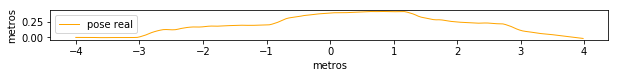

In [34]:
inicio = 5
fin = 4000

plt.figure(figsize=(10, 10))

# plt.title("Posición con odometría")


plt.plot(df['global_y'].values[inicio:fin] , \
         -df['global_x'].values[inicio:fin] + .71, color='#FFA500', linewidth=1, linestyle='-', label='pose real')

#plt.plot(-df['predicted_x'].values[inicio:fin], \
#         -df['predicted_y'].values[inicio:fin], color='k', linewidth=1, linestyle='-.', label='Modelo de bicicleta local')

plt.axes().set_aspect('equal')

plt.axes().set_xlabel('metros')
plt.axes().set_ylabel('metros')

plt.legend()
plt.show()


In [7]:
# odometry
odom_X = df['predicted_x'].values[inicio:fin]
odom_Y = df['predicted_y'].values[inicio:fin]

odom_Yaw = df['pos_odom_theta'].values[inicio:fin]
# odom_Yaw = pd.DataFrame({'odom_theta': [1.57] * len(odom_Yaw)})

odom_x_corregida = 0.74 - odom_Y
odom_y_corregida = 0.008 + odom_X

# odom_U = np.cos(odom_Yaw)
# odom_V = np.sin(odom_Yaw)

odom_U_c = np.cos(1.57 + odom_Yaw)
odom_V_c = np.sin(1.57 + odom_Yaw)

In [35]:
print ("max")
print (df.loc[0:300, ['delta_predicted_y', 'delta_odom_y']].max())

print ("min")
print (df.loc[0:300, ['delta_predicted_y', 'delta_odom_y']].min())

# df.loc[100:150, ['delta_predicted_y', 'delta_odom_y']]

max
delta_predicted_y    0.00107
delta_odom_y         0.00115
dtype: float64
min
delta_predicted_y   -0.00095
delta_odom_y        -0.01916
dtype: float64


road width: 140 cm
cell width: 0.01 m
cell height: 0.04615976878612717 m
lenx 172, len center 172


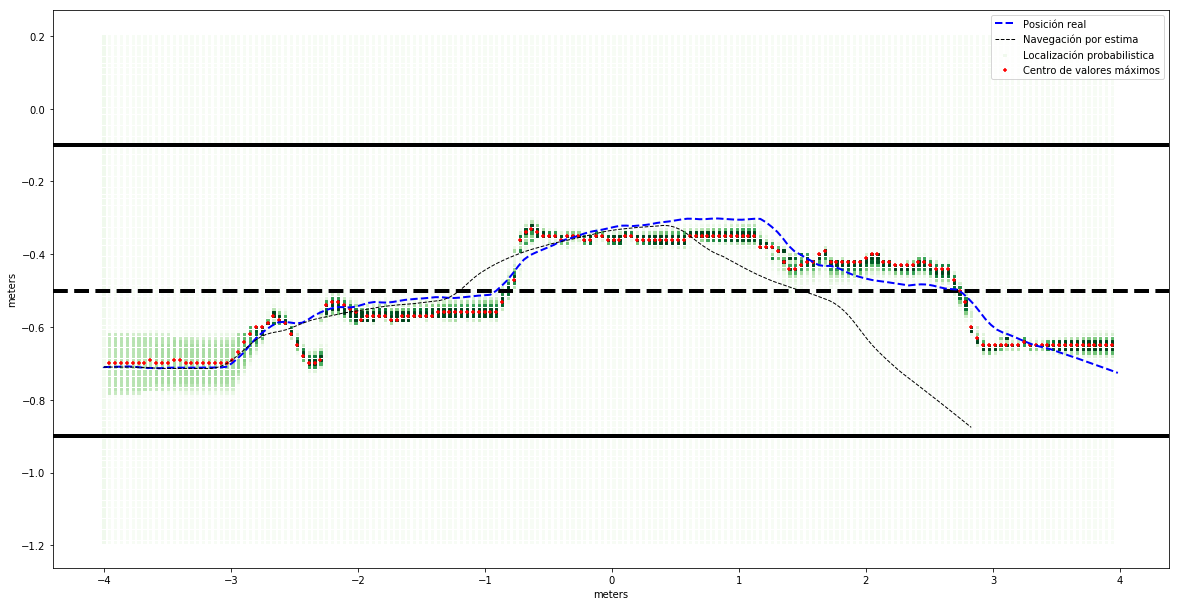

In [230]:
# global pose
inicio = 51
fin = 225

X = df['global_y'].values[inicio:fin]
Y = -df['global_x'].values[inicio:fin] 
Yaw = df['global_theta'].values[inicio:fin] - 1.5707

X_origen = X 
Y_origen = Y 

U = np.cos(Yaw)
V = np.sin(Yaw)

pred_X = df['predicted_x'].values[inicio:fin] - 4
pred_Y = df['predicted_y'].values[inicio:fin] - .71

# distribucion prob
localization_hist = df.iloc[inicio:fin, 1:141].as_matrix()


# params
right_x = .9 # 0.9 # m
center_x = .5 # 0.5 # m
left_x = .1 # 0.1 # m
out_road_dist = 0.3 # m
num_states = 7 
state_width = 20

print ("road width: {0} cm".format(num_states * state_width))

# estimate positions to plot discretization
lines_y = [Y[0], Y[len(Y)-1]] 
cell_width = ((right_x + out_road_dist) - (left_x - out_road_dist)) / (num_states * state_width)
# cell_width = ((left_x + out_road_dist) - (right_x - out_road_dist)) / (num_states * state_width)
print("cell width: {} m".format(cell_width))
cell_height = abs(np.mean([X[i] - X[i + 1] for i in range(len(X)-1)]))
print("cell height: {} m".format(cell_height))


points_x = np.arange(left_x - out_road_dist, right_x + out_road_dist, cell_width)
grid_x, grid_y = np.meshgrid(points_x, np.arange(X[0], X[len(X)-1], cell_height))


fig = plt.figure(figsize=(20, 10))
## fig.suptitle('Car in motion on road', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.9)
# ax.set_title('axes title')





# plt.figure()
## ax.set_aspect('equal')
# plt.axes().set_xlim([-0.2, 1.2])

# show discretization of probabilistic localization

    
# show probabilistic localization
z = localization_hist.flatten() * 5
colors = plt.cm.get_cmap('Greens')(z)
plt.scatter(grid_y, -grid_x,  marker=',', s=5, c=colors, label='Localización probabilistica')

#for x_i in points_x:
#    ax.axhline(x_i, color='lightgray', linestyle='-')

# lines of road

ax.axhline(-.9, color='k', linestyle='-', linewidth=4) #'k--', linewidth=4)
ax.axhline(-.5, color='k', linestyle='dashed', linewidth=4) #'k--', linewidth=4)
ax.axhline(-.1, color='k', linestyle='-', linewidth=4)  #'k--', linewidth=4)

# show orientation
# for global pose
# Q = plt.quiver(X, Y, U, V, color='b',  label='Posición real')

# for odometry
# Q = plt.quiver(odom_x_corregida, odom_y_corregida, odom_U_c, odom_V_c, color='b', pivot='mid', units='xy', scale=40, width=.009)

ax.plot(X, Y, color='b', linestyle='--', linewidth=2, label='Posición real')

ax.plot(pred_X, pred_Y, color='k', linestyle='--', linewidth=1, label='Navegación por estima')

maximos_primera = [np.argmax(row) for row in localization_hist[1:]]
maximos_ultima = [len(row) - np.argmax(row[::-1]) - 1 for row in localization_hist[1:]]
center_of_prob = [-grid_x[1:][i][(int((maximos_primera[i]+maximos_ultima[i])/2))] for i in range(len(-grid_x[1:]))]
center_of_prob_x = [np.mean(row) for row in grid_y[1:]]

print ("lenx {}, len center {}".format(len(grid_y[1:]), len(center_of_prob)))

ax.scatter(center_of_prob_x, center_of_prob, color='#FF0000', s=20, marker='+', label='Centro de valores máximos')


## ax.scatter(odom_x_corregida, odom_y_corregida, color='b', s=5, label='position from odometry: velocity model')

ax.set_xlabel('meters')
ax.set_ylabel('meters')

# no se que hace esto
#qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')

plt.legend()
plt.show()


In [252]:
# analisis de correlación y rms

maximos_primera = [np.argmax(row) for row in localization_hist[1:]]
maximos_ultima = [len(row) - np.argmax(row[::-1]) - 1 for row in localization_hist[1:]]
center_of_prob = [-grid_x[1:][i][(int((maximos_primera[i]+maximos_ultima[i])/2))] for i in range(len(-grid_x[1:]))]
center_of_prob_x = [np.mean(row) for row in grid_y[1:]]

#print("{} {} {}".format(len(center_of_prob), len(Y[1:-1]), len(pred_Y[1:-1])))

#print(center_of_prob)

#correlacion
# total
print("total real vs proba: {}".format(pearson_def(center_of_prob, Y[1:-1])))
print("total real vs odom Y: {}".format(pearson_def(pred_Y, Y)))

# primera mitad
mitad = int(len(center_of_prob)/2)
# print(mitad, len(center_of_prob[mitad:]), len(Y[mitad+1:-1]), len(Y[mitad:]))
print("primera m real vs proba: {}".format(pearson_def(center_of_prob[1:mitad], Y[1:mitad])))
print("primera m real vs odom Y: {}".format(pearson_def(pred_Y[1:mitad], Y[1:mitad])))

# segunda mitad
print("segunda m real vs proba: {}".format(pearson_def(center_of_prob[mitad:], Y[mitad+1:-1])))
print("segunda m real vs odom Y: {}".format(pearson_def(pred_Y[mitad+1:-1], Y[mitad+1:-1])))

#rms
print("rms real vs prob: {}".format(np.sqrt(np.mean(np.square(center_of_prob - Y[1:-1])))))
print("rms real vs odom: {}".format(np.sqrt(np.mean(np.square(pred_Y - Y)))))
# print("rms real vs odom: {}".format(np.sqrt(np.mean(np.square(pred_Y - Y)))))

print("rms primera m real vs proba: {}".format(np.sqrt(np.mean(np.square(center_of_prob[1:mitad] - Y[1:mitad])))))
print("rms primera m real vs odom Y: {}".format(np.sqrt(np.mean(np.square(pred_Y[1:mitad] - Y[1:mitad])))))

# segunda mitad
print("rms segunda m real vs proba: {}".format(np.sqrt(np.mean(np.square(center_of_prob[mitad:] - Y[mitad+1:-1])))))
print("rms segunda m real vs odom Y: {}".format(np.sqrt(np.mean(np.square(pred_Y[mitad+1:-1] - Y[mitad+1:-1])))))


total real vs proba: 0.9403387655988241
total real vs odom Y: 0.9754204463237789
primera m real vs proba: 0.9093323033107946
primera m real vs odom Y: 0.997876368096414
segunda m real vs proba: 0.9408089117297828
segunda m real vs odom Y: 0.9848430769267232
rms real vs prob: 0.047165691203926934
rms real vs odom: 0.04424691836142666
rms primera m real vs proba: 0.05045993247996225
rms primera m real vs odom Y: 0.02568138259059867
rms segunda m real vs proba: 0.0481420235369533
rms segunda m real vs odom Y: 0.054965810208350986


road width: 140 cm
cell width: 0.01 m


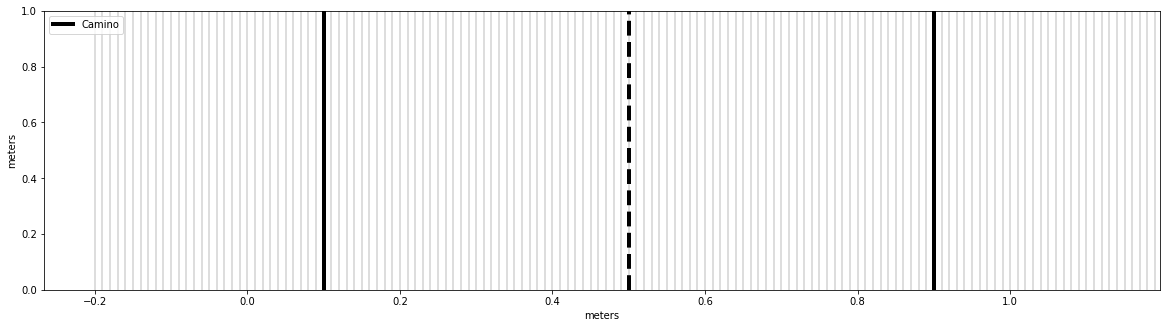

In [71]:
# params
right_x = 0.9 # m
center_x = 0.5 # m
left_x = 0.1 # m
out_road_dist = 0.3 # m
num_states = 7 
state_width = 20

print ("road width: {0} cm".format(num_states * state_width))

# estimate positions to plot discretization
lines_y = [Y[0], Y[len(Y)-1]] 
cell_width = ((right_x + out_road_dist) - (left_x - out_road_dist)) / (num_states * state_width)
print("cell width: {} m".format(cell_width))
cell_height = abs(np.mean([Y[i] - Y[i + 1] for i in range(len(Y)-1)]))

points_x = np.arange(left_x - out_road_dist, right_x + out_road_dist, cell_width)
grid_x, grid_y = np.meshgrid(points_x, np.arange(Y[0], Y[len(Y)-1], cell_height))

# show probabilistic localization
z = localization_hist.flatten() * 254
colors = plt.cm.get_cmap('Blues')(z)
# plt.scatter(grid_x, grid_y,  marker=',', s=10, c=colors)

fig = plt.figure(figsize=(20, 20))
## fig.suptitle('Car in motion on road', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.9)
# ax.set_title('axes title')

# plt.figure()
ax.set_aspect('equal')
# plt.axes().set_xlim([-0.2, 1.2])

# show discretization of probabilistic localization
for x_i in points_x:
    ax.axvline(x_i, color='lightgray', linestyle='solid')

# lines of road
ax.axvline(right_x, color='k', linestyle='-', linewidth=4, label='Camino') #'k--', linewidth=4)
ax.axvline(center_x, color='k', linestyle='dashed', linewidth=4) #'k--', linewidth=4)
ax.axvline(left_x, color='k', linestyle='-', linewidth=4)  #'k--', linewidth=4)

# show orientation
# for global pose
# Q = plt.quiver(X, Y, U, V, color='r', pivot='mid', units='xy', scale=40, width=.009)

# for odometry
# Q = plt.quiver(odom_x_corregida, odom_y_corregida, odom_U_c, odom_V_c, color='b', pivot='mid', units='xy', scale=40, width=.009)

ax.scatter(X, Y, color='r', s=5, label='position from simulator')
ax.scatter(odom_x_corregida, odom_y_corregida, color='b', s=5, label='position from odometry: velocity model')

ax.set_xlabel('meters')
ax.set_ylabel('meters')

# no se que hace esto
#qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
#                   coordinates='figure')

plt.legend()
plt.show()

In [309]:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


In [ ]:
2.356